In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
img=cv2.imread("/content/water_coins.jpg",0)
I=cv2.imread("/content/water_coins.jpg")

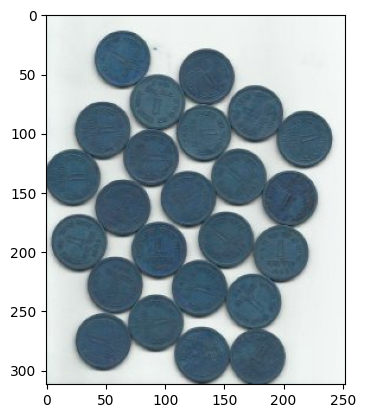

In [ ]:
plt.imshow(I)

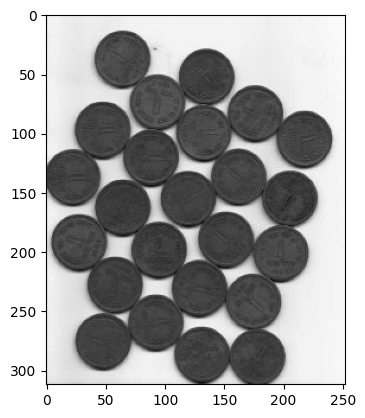

In [ ]:
plt.imshow(img,cmap="gray")

In [ ]:
#OTSU method for getting binary image
ret,th1=cv2.threshold(img,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

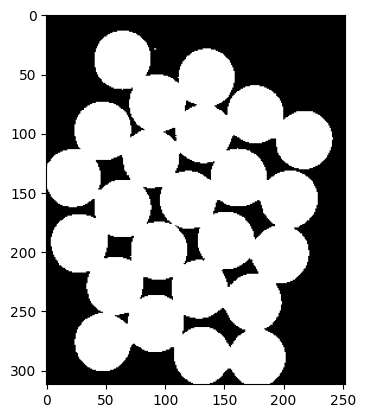

In [ ]:
plt.imshow(th1,cmap="gray")

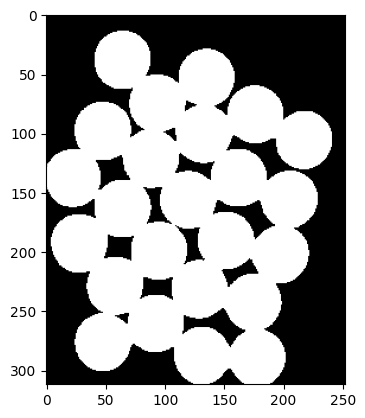

In [ ]:
k=cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
B1=cv2.morphologyEx(th1,cv2.MORPH_OPEN,k)
plt.imshow(B1,cmap="gray")
plt.show()

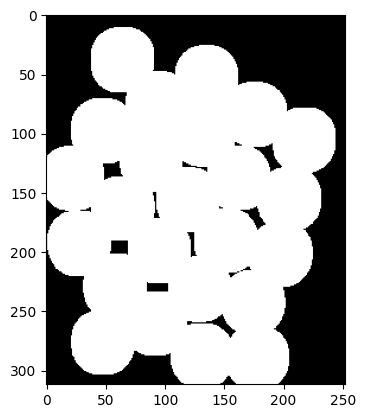

In [ ]:
bag=cv2.dilate(B1,k,iterations=3)
plt.imshow(bag,cmap="gray")

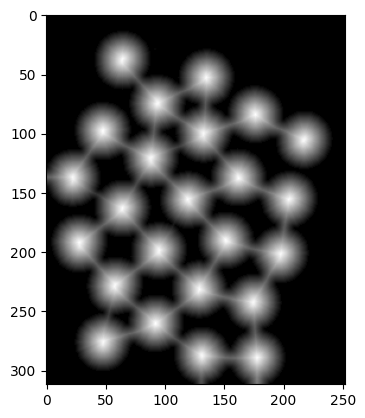

In [ ]:
D=cv2.distanceTransform(th1,cv2.DIST_L2,5)
plt.imshow(D,cmap="gray")

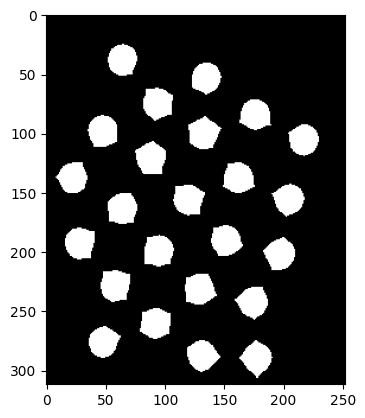

In [ ]:
r2,obj=cv2.threshold(D,0.5*D.max(),255,cv2.THRESH_BINARY)
obj=obj.astype(np.uint8)
plt.imshow(obj,cmap="gray")
plt.show()

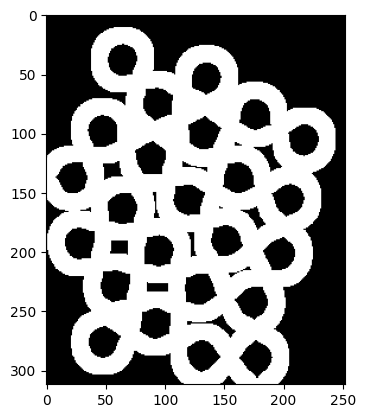

In [ ]:
U=cv2.subtract(bag,obj)
plt.imshow(U,cmap="gray")
plt.show()

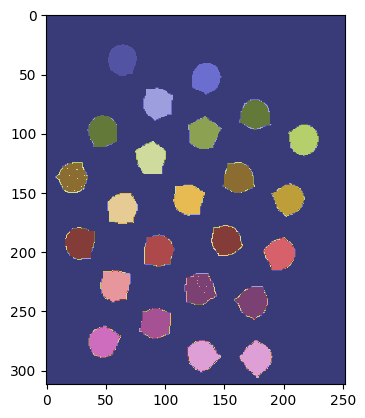

In [ ]:
r3,M=cv2.connectedComponents(obj)
M=M+1
M[U==255]=0
plt.imshow(M,cmap="tab20b")
plt.show()

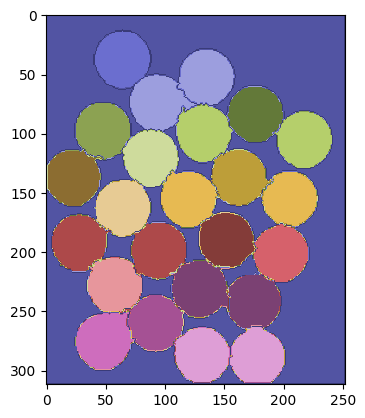

In [ ]:
M2=cv2.watershed(I,M)
plt.imshow(M2,cmap="tab20b")
plt.show()

In [ ]:
L=np.unique(M2)
New_img=[]

In [ ]:
for l in L[2:]:
  T=np.where(M2==l,255,0).astype(np.uint8)
  c,h=cv2.findContours(T,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
  New_img.append(c[0])

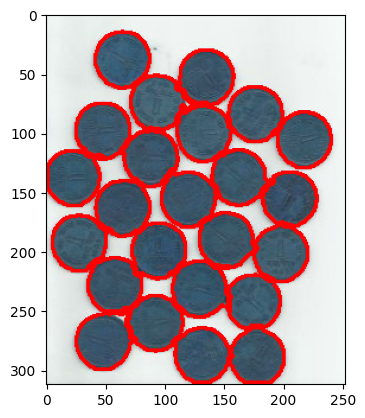

In [ ]:
I1=cv2.drawContours(I,New_img,-1,(255,0,0),thickness=2)
plt.imshow(I1)
